Dataset : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/versions/1

# ETL

#Data Normalization

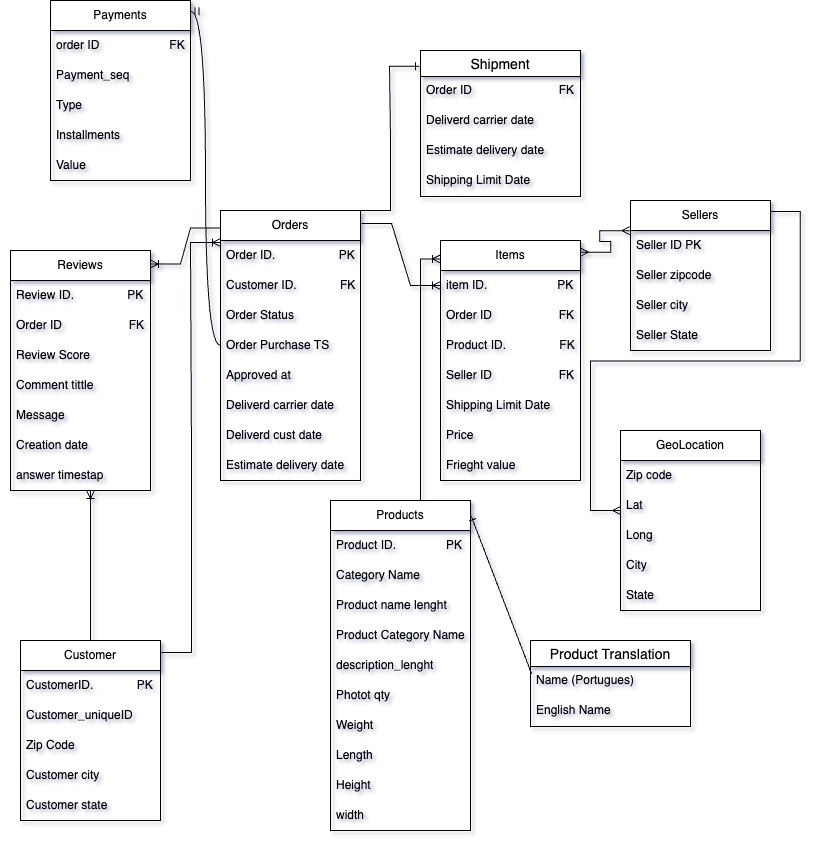

In [ ]:
from IPython.display import Image
Image(filename='sales_data.jpg')

Splitting the dataframe into different tables and creating a normalized form


DELTA

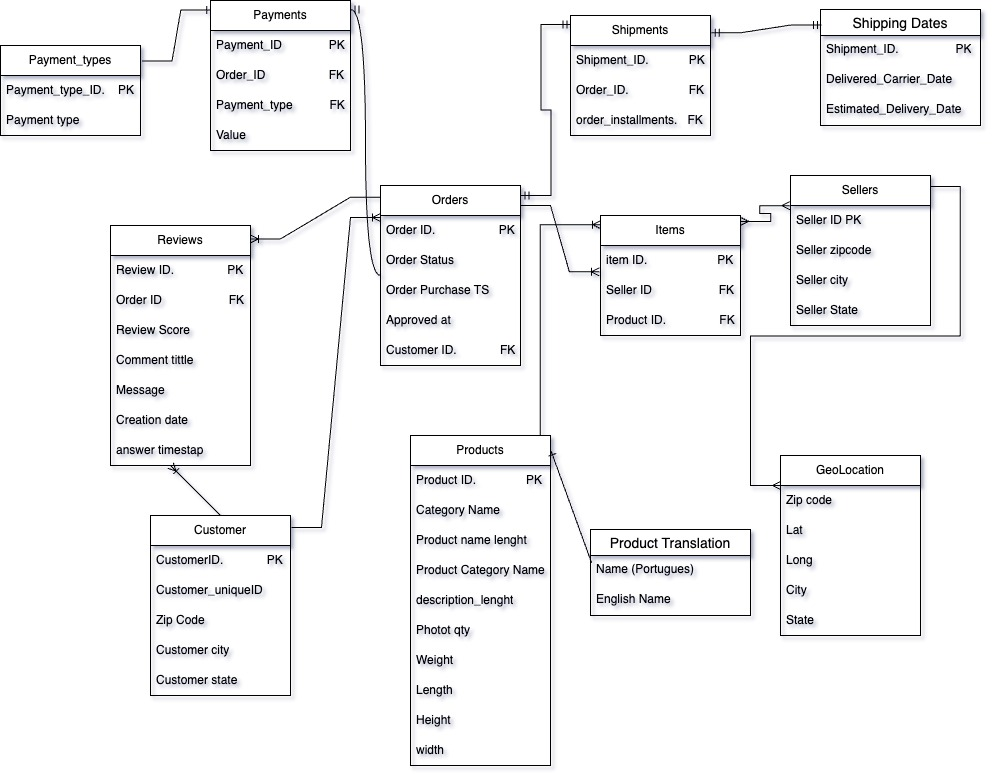

In [ ]:
from IPython.display import Image
Image(filename='Sales_ERD.jpg')

# Transforming the data

In [1]:
import pandas as pd
df_customers = pd.read_csv("customers_dataset.csv")
df_geolocation = pd.read_csv("geolocation_dataset.csv")
df_order_items = pd.read_csv("order_items_dataset.csv")
df_order_payments = pd.read_csv("order_payments_dataset.csv")
df_order_reviews = pd.read_csv("order_reviews_dataset.csv")
df_orders = pd.read_csv("orders_dataset.csv")
df_products = pd.read_csv("products_dataset.csv")
df_product_category_name_translation  = pd.read_csv("product_category_name_translation.csv")
df_sellers  = pd.read_csv("sellers_dataset.csv")

In [2]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


# Data Transformation for Orders Table

In [3]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders.order_purchase_timestamp)
df_orders['order_approved_at'] = pd.to_datetime(df_orders.order_approved_at)
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders.order_delivered_carrier_date )
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders.order_delivered_customer_date)
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders.order_estimated_delivery_date)
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items.shipping_limit_date)
df_order_reviews['review_creation_date'] = pd.to_datetime(df_order_reviews.review_creation_date)
df_order_reviews['review_answer_timestamp'] = pd.to_datetime(df_order_reviews.review_answer_timestamp)

columns_timestamp = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in columns_timestamp:
    df_orders[column] = pd.to_datetime(df_orders[column])

In [4]:
import datetime
df_orders['year'] = df_orders['order_purchase_timestamp'].dt.year

In [5]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
year                                0
dtype: int64

Handling Missing Values


In [6]:
df_orders['order_approved_at'] =df_orders['order_approved_at'].fillna(df_orders['order_purchase_timestamp'])

In [7]:
df_orders['order_delivered_customer_date'].fillna(df_orders['order_estimated_delivery_date'],inplace = True)

In [8]:
df_orders.drop(labels = 'order_delivered_carrier_date',axis = 1, inplace = True)

In [9]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [10]:
df_products['product_weight_g'].fillna(df_products['product_weight_g'].median(), inplace  = True)

In [11]:
df_products['product_length_cm'].fillna(df_products['product_length_cm'].median(), inplace  = True)

In [12]:
df_products['product_height_cm'].fillna(df_products['product_height_cm'].median(), inplace  = True)

In [13]:
df_products['product_width_cm'].fillna(df_products['product_width_cm'].median(), inplace  = True)

In [14]:
df_products.drop(labels = 'product_photos_qty',axis = 1, inplace = True)

In [15]:
df_products.drop(labels = 'product_description_lenght',axis = 1, inplace = True)

In [16]:
df_products.drop(labels = 'product_name_lenght',axis = 1, inplace = True)

In [17]:
most = df_products['product_category_name'].value_counts(dropna=True)
voted = most.idxmax()
df_products['product_category_name'].fillna(voted, inplace=True)

# Data Transformation for Customer Table

In [18]:
df_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

customer_id --> PK

customer_unique_id          
customer_zip_code_prefix    
customer_city               
customer_state              

# Data Transformation for Geolocation Table

In [19]:
df_geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               1
geolocation_state              1
dtype: int64

In [20]:
time_countss = df_geolocation['geolocation_city'].value_counts(dropna=True)
most_frequent_time = time_countss.idxmax()
df_geolocation['geolocation_city'].fillna(most_frequent_time, inplace=True)

In [21]:
time_countss = df_geolocation['geolocation_state'].value_counts(dropna=True)
most_frequent_time = time_countss.idxmax()
df_geolocation['geolocation_state'].fillna(most_frequent_time, inplace=True)

geolocation_zip_code_prefix --> PK

geolocation_lat                
geolocation_lng                
geolocation_city               
geolocation_state              

# Data Transformation for order_items Table

In [22]:
df_order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

order_id --> PK

order_item_id       

product_id  --> FK  

seller_id           

shipping_limit_date

price

freight_value

# Data Transformation for Payments Table

In [23]:
df_order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

order_id --> PK

payment_sequential

payment_type

payment_installments

payment_value           

In [24]:
df_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [25]:
df_order_reviews.drop(columns=['review_comment_title'], inplace=True)

In [26]:
most = df_order_reviews['review_comment_message'].value_counts(dropna=True)
voted = most.idxmax()
df_order_reviews['review_comment_message'].fillna(voted, inplace=True)

review_id                      PK

order_id                       FK

review_score                  

review_comment_message     

review_creation_date           

review_answer_timestamp    

# Data Transformation for orders Table

In [27]:
df_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_estimated_delivery_date    0
year                             0
dtype: int64

order_id                         PK

customer_id                      FK

order_status                     

order_purchase_timestamp         

order_approved_at                

order_delivered_customer_date    

order_estimated_delivery_date    

year                             

# Data Transformation for products Table

In [28]:
df_products.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

product_id               PK

product_category_name    

product_weight_g         

product_length_cm        

product_height_cm        

product_width_cm  

# Data Transformation for Sellers Table

In [29]:
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

seller_id                 PK

seller_zip_code_prefix    

seller_city               

seller_state             

#Loading the data

In [30]:
import sqlite3
import csv

# Staging the Data

In [ ]:
conn = sqlite3.connect("Staging_data.db")
cursor = conn.cursor()
cursor.execute("PRAGMA foreign_keys = ON")

cursor.execute("""
CREATE TABLE geolocation (
  zip_code_prefix VARCHAR(5) PRIMARY KEY,
  lat DECIMAL(9, 6),
  lng DECIMAL(9, 6),
  city VARCHAR(255),
  state VARCHAR(2)
);
""")
cursor.execute("""
CREATE TABLE customer (
  customer_id VARCHAR(255) PRIMARY KEY,
  unique_id VARCHAR,
  city VARCHAR(255),
  state VARCHAR(2),
  zip_code_prefix VARCHAR(5),
  FOREIGN KEY(zip_code_prefix) REFERENCES geolocation(zip_code_prefix)
);
""")
cursor.execute("""
CREATE TABLE sellers (
  seller_id VARCHAR(255) PRIMARY KEY,
  city VARCHAR(255),
  state VARCHAR(2),
  zip_code_prefix VARCHAR(5),
  FOREIGN KEY(zip_code_prefix) REFERENCES geolocation(zip_code_prefix)
);
""")
cursor.execute("""
CREATE TABLE products(
  product_id VARCHAR(255) PRIMARY KEY,
  category_name VARCHAR(255),
  weight_g DECIMAL(10, 2),
  length_cm DECIMAL(10, 2),
  height_cm DECIMAL(10, 2),
  width_cm DECIMAL(10, 2)
);
""")
cursor.execute("""
CREATE TABLE items (
  order_id VARCHAR(255) PRIMARY KEY,
  product_id VARCHAR(255),
  seller_id VARCHAR(255),
  price DECIMAL(10, 2),
  FOREIGN KEY(seller_id) REFERENCES sellers(seller_id),
  FOREIGN KEY(product_id) REFERENCES sellers(product_id)
);
""")

cursor.execute("""
CREATE TABLE orders(
  order_id VARCHAR(255) PRIMARY KEY,
  customer_id VARCHAR(255),
  status ENUM,
  purchase_timestamp DATETIME,
  approved_at DATETIME,
  FOREIGN KEY(customer_id) REFERENCES customer(customer_id)
);
""")
cursor.execute("""
CREATE TABLE shipments(
  shipment_id INTEGER PRIMARY KEY,
  order_id VARCHAR(255) FOREIGN KEY,
  purchase_timestamp DATETIME,
  approved_at DATETIME,
  delivered_customer_date DATETIME,
  estimated_delivery_date DATETIME,
  year YEAR,
  FOREIGN KEY(order_id) REFERENCES orders(order_id)
);
""")

cursor.execute("""
CREATE TABLE shipments_dates(
  shipment_id INTEGER PRIMARY KEY,
  delivered_customer_date DATETIME,
  estimated_delivery_date DATETIME,
  FOREIGN KEY(shipment_id) REFERENCES shipments(shipment_id)
);
""")

cursor.execute("""
CREATE TABLE payments(
  payment_id INTEGER PRIMARY KEY,
  order_id VARCHAR(255) FOREIGN KEY,
  FOREIGN KEY(order_id) REFERENCES orders(order_id)
);
""")

cursor.execute("""
CREATE TABLE payments_types(
  payment_types_id FOREGIN KEY,
  payment_installments INTEGER,
  payment_type ENUM,
  payment_value DECIMAL(10,2),
  FOREIGN KEY(payment_types_id) REFERENCES payments(payment_id)
);
""")

cursor.execute("""
CREATE TABLE reviews(
  review_id VARCHAR(255) PRIMARY KEY,
  order_id VARCHAR(255),
  score INTEGER,
  comment_message VARCHAR(255),
  creation_date DATETIME,
  answer_timestamp DATETIME,
  FOREIGN KEY(order_id) REFERENCES orders(order_id)
);
""")
cursor.execute("""
CREATE TABLE translation(
  category_name VARCHAR(255) PRIMARY KEY,
  category_name_english VARCHAR(255)
);
""")
conn.close()

In [34]:
conn = sqlite3.connect("Staging_data.db")
cursor = conn.cursor()
cursor.execute("PRAGMA foreign_keys = ON")

cursor.execute("""
CREATE TABLE geolocation (
  zip_code_prefix VARCHAR(5) PRIMARY KEY,
  lat DECIMAL(9, 6),
  lng DECIMAL(9, 6),
  city VARCHAR(255),
  state VARCHAR(2)
);
""")
cursor.execute("""
CREATE TABLE customer (
  customer_id VARCHAR(255) PRIMARY KEY,
  unique_id VARCHAR,
  city VARCHAR(255),
  state VARCHAR(2),
  zip_code_prefix VARCHAR(5),
  FOREIGN KEY(zip_code_prefix) REFERENCES geolocation(zip_code_prefix)
);
""")
cursor.execute("""
CREATE TABLE sellers (
  seller_id VARCHAR(255) PRIMARY KEY,
  city VARCHAR(255),
  state VARCHAR(2),
  zip_code_prefix VARCHAR(5),
  FOREIGN KEY(zip_code_prefix) REFERENCES geolocation(zip_code_prefix)
);
""")
cursor.execute("""
CREATE TABLE products(
  product_id VARCHAR(255) PRIMARY KEY,
  category_name VARCHAR(255),
  weight_g DECIMAL(10, 2),
  length_cm DECIMAL(10, 2),
  height_cm DECIMAL(10, 2),
  width_cm DECIMAL(10, 2)
);
""")
cursor.execute("""
CREATE TABLE items (
  order_id VARCHAR(255) PRIMARY KEY,
  order_item_id VARCHAR(2),
  product_id VARCHAR(255),
  seller_id VARCHAR(255),
  shipping_limit_date DATETIME,
  price DECIMAL(10, 2),
  freight_value DECIMAL(10, 2),
  FOREIGN KEY(seller_id) REFERENCES sellers(seller_id),
  FOREIGN KEY(product_id) REFERENCES sellers(product_id)
);
""")
cursor.execute("""
CREATE TABLE orders(
  order_id VARCHAR(255) PRIMARY KEY,
  customer_id VARCHAR(255),
  status ENUM,
  purchase_timestamp DATETIME,
  approved_at DATETIME,
  delivered_customer_date DATETIME,
  estimated_delivery_date DATETIME,
  year YEAR,
  FOREIGN KEY(customer_id) REFERENCES customer(customer_id)
);
""")
cursor.execute("""
CREATE TABLE payments(
  order_id VARCHAR(255) PRIMARY KEY,
  payment_sequential INTEGER,
  payment_type ENUM,
  payment_installments INTEGER,
  payment_value DECIMAL(10,2)
);
""")
cursor.execute("""
CREATE TABLE reviews(
  review_id VARCHAR(255) PRIMARY KEY,
  order_id VARCHAR(255),
  score INTEGER,
  comment_message VARCHAR(255),
  creation_date DATETIME,
  answer_timestamp DATETIME,
  FOREIGN KEY(order_id) REFERENCES orders(order_id)
);
""")
cursor.execute("""
CREATE TABLE translation(
  category_name VARCHAR(255) PRIMARY KEY,
  category_name_english VARCHAR(255)
);
""")
conn.close()

#Loading Data in the DATABASE

In [35]:
conn = sqlite3.connect('Staging_data.db')
df_customers.to_sql('customer', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

In [36]:
conn = sqlite3.connect('Staging_data.db')
df_geolocation.to_sql('geolocation', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

In [37]:
conn = sqlite3.connect('Staging_data.db')
df_order_items.to_sql('items', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

In [38]:
conn = sqlite3.connect('Staging_data.db')
df_order_payments.to_sql('payments', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

In [39]:
conn = sqlite3.connect('Staging_data.db')
df_order_reviews.to_sql('reviews', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

In [40]:
conn = sqlite3.connect('Staging_data.db')
df_orders.to_sql('orders', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

In [41]:
conn = sqlite3.connect('Staging_data.db')
df_product_category_name_translation.to_sql('translation', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

In [42]:
conn = sqlite3.connect('Staging_data.db')
df_products.to_sql('products', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

In [43]:
conn = sqlite3.connect('Staging_data.db')
df_sellers.to_sql('sellers', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

# DIMENSIONAL SCHEMA

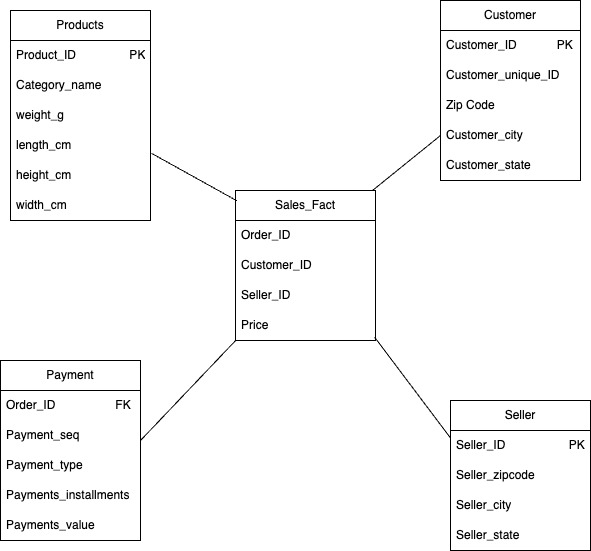

In [69]:
from IPython.display import Image
Image(filename='Star_schema.jpg')

#Creating the star schema in DB

In [44]:
conn = sqlite3.connect("datawarehouse.db")
cursor = conn.cursor()
cursor.execute("PRAGMA foreign_keys = ON")

cursor.execute("""
CREATE TABLE sales_fact (
  sales_uid INTEGER PRIMARY KEY,
  order_id VARCHAR(255),
  customer_id VARCHAR(255),
  seller_id VARCHAR(255),
  price DECIMAL(10, 2)
);
""")

cursor.execute("""
CREATE TABLE products_dim (
  product_uid INTEGER PRIMARY KEY,
  product_id VARCHAR(255),
  category_name VARCHAR(255),
  weight_g DECIMAL(10,2),
  length_cm DECIMAL(10,2),
  height_cm DECIMAL(10,2),
  width_cm DECIMAL(10,2),
  start_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
  end_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
  current_flag BOOLEAN DEFAULT FALSE
);
""")
cursor.execute("""
CREATE TABLE customers_dim (
  customer_uif INTEGER PRIMARY KEY,
  customer_id VARCHAR(255),
  unique_id VARCHAR,
  city VARCHAR(255),
  state VARCHAR(2),
  zip_code_prefix VARCHAR(5)
);
""")
cursor.execute("""
CREATE TABLE payments_dim (
  payments_uid INTEGER PRIMARY KEY,
  order_id VARCHAR(255),
  payment_sequential INTEGER,
  payment_type ENUM,
  payment_installments INTEGER,
  payment_value DECIMAL(10,2)
);
""")
cursor.execute("""
CREATE TABLE sellers_dim (
  sellers_uid INTEGER PRIMARY KEY,
  seller_id VARCHAR(255),
  city VARCHAR(255),
  state VARCHAR(2),
  zip_code_prefix VARCHAR(5),
  start_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
  current_flag BOOLEAN DEFAULT TRUE
);
""")
conn.close()

In [45]:
conn_source = sqlite3.connect('Staging_data.db')
cursor_source = conn_source.cursor()

conn_target = sqlite3.connect('datawarehouse.db')
cursor_target = conn_target.cursor()

select_query = """
SELECT customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state
FROM customer;
"""

cursor_source.execute(select_query)
customer_data = cursor_source.fetchall()

# Insert fetched data into the target database (datawarehouse.db)
insert_query = """
INSERT INTO customers_dim (customer_id, unique_id, zip_code_prefix, city, state)
VALUES (?, ?, ?, ?, ?);
"""

for row in customer_data:
    cursor_target.execute(insert_query, row)  # Insert each row from source to target

conn_target.commit()  # Commit changes to the target database
conn_source.close()  # Close connections to both databases
conn_target.close()


Check if data is inserted

In [46]:
conn = sqlite3.connect('datawarehouse.db')
cursor = conn.cursor()
def res(q):
  res_q = pd.read_sql_query(q,conn)
  return res_q
query_1 = """ select * from customers_dim limit 5"""
res(query_1)

,customer_uif,customer_id,unique_id,city,state,zip_code_prefix
0,1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,14409
1,2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,9790
2,3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,1151
3,4,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,8775
4,5,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,13056


Loading data in products

In [47]:

conn_source = sqlite3.connect('Staging_data.db')
cursor_source = conn_source.cursor()


conn_target = sqlite3.connect('datawarehouse.db')
cursor_target = conn_target.cursor()

select_query = """
SELECT product_id, product_category_name, product_weight_g, product_length_cm, product_height_cm, product_width_cm
FROM products;
"""


cursor_source.execute(select_query)
product_data = cursor_source.fetchall()


insert_query = """
INSERT INTO products_dim (product_id, category_name, weight_g, length_cm, height_cm, width_cm)
VALUES (?, ?, ?, ?, ?, ?);
"""

for row in product_data:
    cursor_target.execute(insert_query, row)  # Insert each row from source to target

conn_target.commit()  # Commit changes to the target database
conn_source.close()  # Close connections to both databases
conn_target.close()

In [48]:
conn = sqlite3.connect('datawarehouse.db')
cursor = conn.cursor()
def res(q):
  res_q = pd.read_sql_query(q,conn)
  return res_q
query_1 = """ select * from products_dim limit 5"""
res(query_1)


,product_uid,product_id,category_name,weight_g,length_cm,height_cm,width_cm,start_date,end_date,current_flag
0,1,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225,16,10,14,2023-12-12 23:05:41,2023-12-12 23:05:41,0
1,2,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000,30,18,20,2023-12-12 23:05:41,2023-12-12 23:05:41,0
2,3,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154,18,9,15,2023-12-12 23:05:41,2023-12-12 23:05:41,0
3,4,cef67bcfe19066a932b7673e239eb23d,bebes,371,26,4,26,2023-12-12 23:05:41,2023-12-12 23:05:41,0
4,5,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625,20,17,13,2023-12-12 23:05:41,2023-12-12 23:05:41,0


Loading Data into seller

In [49]:

conn_source = sqlite3.connect('Staging_data.db')
cursor_source = conn_source.cursor()


conn_target = sqlite3.connect('datawarehouse.db')
cursor_target = conn_target.cursor()


select_query = """
SELECT seller_id, seller_zip_code_prefix, seller_city, seller_state
FROM sellers;
"""

cursor_source.execute(select_query)
sellers_data = cursor_source.fetchall()

insert_query = """
INSERT INTO sellers_dim (seller_id, zip_code_prefix, city, state)
VALUES (?, ?, ?, ?);
"""

for row in sellers_data:
    cursor_target.execute(insert_query, row)

conn_target.commit()
conn_source.close()
conn_target.close()


In [50]:
conn = sqlite3.connect('datawarehouse.db')
cursor = conn.cursor()
def res(q):
  res_q = pd.read_sql_query(q,conn)
  return res_q
query_1 = """ select * from sellers_dim limit 5"""
res(query_1)

,sellers_uid,seller_id,city,state,zip_code_prefix,start_date,current_flag
0,1,3442f8959a84dea7ee197c632cb2df15,campinas,SP,13023,2023-12-12 23:05:46,1
1,2,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,13844,2023-12-12 23:05:46,1
2,3,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,20031,2023-12-12 23:05:46,1
3,4,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,4195,2023-12-12 23:05:46,1
4,5,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,12914,2023-12-12 23:05:46,1


Loading Data into payments

In [51]:
conn_source = sqlite3.connect('Staging_data.db')
cursor_source = conn_source.cursor()

conn_target = sqlite3.connect('datawarehouse.db')
cursor_target = conn_target.cursor()

select_query = """
SELECT order_id, payment_sequential, payment_type, payment_installments, payment_value
FROM payments;
"""

cursor_source.execute(select_query)
payments_data = cursor_source.fetchall()

insert_query = """
INSERT INTO payments_dim (order_id, payment_sequential, payment_type, payment_installments, payment_value)
VALUES (?, ?, ?, ?, ?);
"""

for row in payments_data:
    cursor_target.execute(insert_query, row)  # Insert each row from source to target

conn_target.commit()  # Commit changes to the target database
conn_source.close()  # Close connections to both databases
conn_target.close()


In [52]:
conn = sqlite3.connect('datawarehouse.db')
cursor = conn.cursor()
def res(q):
  res_q = pd.read_sql_query(q,conn)
  return res_q
query_1 = """ select * from payments_dim limit 5"""
res(query_1)

,payments_uid,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,1,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,5,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Loadind Data in Fact Table

In [53]:
conn_source = sqlite3.connect('Staging_data.db')
conn_target = sqlite3.connect('datawarehouse.db')

conn_target.execute("ATTACH DATABASE 'Staging_data.db' AS source")

cursor_source = conn_source.cursor()
cursor_target = conn_target.cursor()

query = """
INSERT INTO sales_fact (order_id, customer_id, seller_id, price)
SELECT a.order_id, a.customer_id, c.seller_id, b.price
FROM source.orders a
JOIN source.items b ON a.order_id = b.order_id
JOIN source.sellers c ON b.seller_id = c.seller_id;
"""

cursor_target.execute(query)
conn_target.commit()

conn_source.close()
conn_target.close()


In [54]:
conn = sqlite3.connect('datawarehouse.db')
cursor = conn.cursor()
def res(q):
  res_q = pd.read_sql_query(q,conn)
  return res_q
query_1 = """ select * from sales_fact"""
res(query_1)

,sales_uid,order_id,customer_id,seller_id,price
0,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,29.99
1,2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,118.70
2,3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,159.90
3,4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,45.00
4,5,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,19.90
...,...,...,...,...,...
112645,112646,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,1f9ab4708f3056ede07124aad39a2554,174.90
112646,112647,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,d50d79cb34e38265a8649c383dcffd48,205.99
112647,112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,a1043bafd471dff536d0c462352beb48,179.99
112648,112649,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,a1043bafd471dff536d0c462352beb48,179.99


# SCD type 1

In [55]:
conn = sqlite3.connect('Staging_data.db')
cursor = conn.cursor()

query_1 = """
INSERT INTO customer (customer_id, customer_unique_id, customer_city, customer_state, customer_zip_code_prefix)
VALUES ('101', 'unique_101', 'New York', 'NY', '10001');
"""

cursor.execute(query_1)
conn.commit()
conn.close()


In [56]:
conn = sqlite3.connect('Staging_data.db')
cursor = conn.cursor()
def res(q):
  res_q = pd.read_sql_query(q,conn)
  return res_q
query_1 = """ select * from customer where customer_zip_code_prefix = '10001' """
res(query_1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,101,unique_101,10001,New York,NY


In [57]:
def sync_staging_to_data_warehouse():
    try:
        conn_staging = sqlite3.connect('Staging_data.db')
        conn_data_warehouse = sqlite3.connect('datawarehouse.db')

        cursor_staging = conn_staging.cursor()
        cursor_data_warehouse = conn_data_warehouse.cursor()

        # Fetch only customer IDs from the staging database (e.g., customer table)
        cursor_staging.execute("SELECT customer_id FROM customer")
        staging_customer_ids = cursor_staging.fetchall()

        # Fetch existing customer IDs from the data warehouse
        cursor_data_warehouse.execute("SELECT customer_id FROM customers_dim")
        existing_customer_ids = set([row[0] for row in cursor_data_warehouse.fetchall()])

        # Identify new customer IDs that don't exist in the data warehouse
        new_customer_ids = [cust_id[0] for cust_id in staging_customer_ids if cust_id[0] not in existing_customer_ids]

        # Fetch details for new customers from staging and insert into the data warehouse
        for customer_id in new_customer_ids:
            cursor_staging.execute("SELECT * FROM customer WHERE customer_id = ?", (customer_id,))
            new_customer = cursor_staging.fetchone()

            # Insert as a new record in customers_dim
            insert_query = """
            INSERT INTO customers_dim (customer_id, unique_id, zip_code_prefix, city, state)
            VALUES (?, ?, ?, ?, ?);
            """
            cursor_data_warehouse.execute(insert_query, new_customer)

        # Insert fetched data directly into the target database (datawarehouse.db)
        select_query = """
        SELECT customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state
        FROM customer;
        """
        cursor_staging.execute(select_query)
        customer_data = cursor_staging.fetchall()

        insert_query = """
        INSERT INTO customers_dim (customer_id, unique_id, zip_code_prefix, city, state)
        VALUES (?, ?, ?, ?, ?);
        """

        for row in customer_data:
            cursor_data_warehouse.execute(insert_query, row)  # Insert each row from source to target

        conn_data_warehouse.commit()  # Commit changes to the target database
        print("Data synchronization completed successfully!")

    except sqlite3.Error as e:
        print(f"Error occurred: {e}")
    finally:
        conn_staging.close()
        conn_data_warehouse.close()

# Run the synchronization function
sync_staging_to_data_warehouse()


Data synchronization completed successfully!


In [58]:
conn = sqlite3.connect('datawarehouse.db')
cursor = conn.cursor()
def res(q):
  res_q = pd.read_sql_query(q,conn)
  return res_q
query_1 = """ select * from customers_dim where zip_code_prefix = '10001' """
res(query_1)

,customer_uif,customer_id,unique_id,city,state,zip_code_prefix
0,99442,101,unique_101,New York,NY,10001
1,198884,101,unique_101,New York,NY,10001


In [59]:
conn.commit()
conn.close()

# SCD type 2

In [62]:
conn = sqlite3.connect('Staging_data.db')
cursor = conn.cursor()
def res(q):
  res_q = pd.read_sql_query(q,conn)
  return res_q
query_1 = """ select * from products where product_category_name = 'perfumaria' """
res(query_1)

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,400.0,27.0,5.0,20.0
2,0d009643171aee696f4733340bc2fdd0,perfumaria,422.0,21.0,16.0,18.0
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,267.0,17.0,13.0,17.0
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,377.0,18.0,13.0,15.0
...,...,...,...,...,...,...
863,8e01228e1cb067cf324c968542f2f032,perfumaria,395.0,20.0,16.0,17.0
864,33bfc11487d18d2405f84661bc164f0f,perfumaria,545.0,21.0,14.0,17.0
865,c49f7bd8ac21b2169dd273bfef92b82a,perfumaria,500.0,16.0,16.0,22.0
866,6ebc84d95d4340324cf0cb525e495eed,perfumaria,120.0,12.0,9.0,10.0


In [63]:
conn.commit()
conn.close()

In [64]:
from datetime import datetime
import time
from contextlib import closing

def update_staging_and_target_category(old_category_name, new_category_name):
    try:
        # Update staging database
        with closing(sqlite3.connect('Staging_data.db')) as conn_staging:
            cursor_staging = conn_staging.cursor()

            cursor_staging.execute("""
                UPDATE products
                SET product_category_name = ?
                WHERE product_category_name = ?
                """, (new_category_name, old_category_name))

            conn_staging.commit()
            print(f"Category '{old_category_name}' updated to '{new_category_name}' in staging database successfully!")

        # Update target database
        with closing(sqlite3.connect('datawarehouse.db')) as conn_data_warehouse:
            cursor_data_warehouse = conn_data_warehouse.cursor()

            # Set SERIALIZABLE isolation level for exclusive access
            cursor_data_warehouse.execute("PRAGMA isolation_level = SERIALIZABLE")

            current_time = datetime.now()

            cursor_data_warehouse.execute("""
            UPDATE products_dim
            SET category_name = ?, end_date = ?, current_flag = ?
            WHERE category_name = ? and current_flag = 0
            """, (new_category_name, current_time, True, old_category_name))

            conn_data_warehouse.commit()
            print(f"Category '{old_category_name}' updated to '{new_category_name}' in target database successfully!")

    except sqlite3.Error as e:
        print(f"Error occurred while updating category: {e}")

# Update both staging and target databases
update_staging_and_target_category('perfumaria', 'Perfumes')


Category 'perfumaria' updated to 'Perfumes' in staging database successfully!
Category 'perfumaria' updated to 'Perfumes' in target database successfully!


In [65]:
conn = sqlite3.connect('datawarehouse.db')
cursor = conn.cursor()
def res(q):
  res_q = pd.read_sql_query(q,conn)
  return res_q
query_1 = """ select * from products_dim where category_name='Perfumes' """
res(query_1)

,product_uid,product_id,category_name,weight_g,length_cm,height_cm,width_cm,start_date,end_date,current_flag
0,1,1e9e8ef04dbcff4541ed26657ea517e5,Perfumes,225,16,10,14,2023-12-12 23:05:41,2023-12-12 23:22:14.333589,1
1,17,6a2fb4dd53d2cdb88e0432f1284a004c,Perfumes,400,27,5,20,2023-12-12 23:05:41,2023-12-12 23:22:14.333589,1
2,78,0d009643171aee696f4733340bc2fdd0,Perfumes,422,21,16,18,2023-12-12 23:05:41,2023-12-12 23:22:14.333589,1
3,85,b1eae565a61935e0011ee7682fef9dc9,Perfumes,267,17,13,17,2023-12-12 23:05:41,2023-12-12 23:22:14.333589,1
4,121,8da90b37f0fb171b4877c124f965b1f6,Perfumes,377,18,13,15,2023-12-12 23:05:41,2023-12-12 23:22:14.333589,1
...,...,...,...,...,...,...,...,...,...,...
863,32711,8e01228e1cb067cf324c968542f2f032,Perfumes,395,20,16,17,2023-12-12 23:05:42,2023-12-12 23:22:14.333589,1
864,32745,33bfc11487d18d2405f84661bc164f0f,Perfumes,545,21,14,17,2023-12-12 23:05:42,2023-12-12 23:22:14.333589,1
865,32781,c49f7bd8ac21b2169dd273bfef92b82a,Perfumes,500,16,16,22,2023-12-12 23:05:42,2023-12-12 23:22:14.333589,1
866,32920,6ebc84d95d4340324cf0cb525e495eed,Perfumes,120,12,9,10,2023-12-12 23:05:42,2023-12-12 23:22:14.333589,1


In [66]:
conn.commit()
conn.close()

In [67]:
conn = sqlite3.connect('datawarehouse.db')
cursor = conn.cursor()
def res(q):
  res_q = pd.read_sql_query(q,conn)
  return res_q
query_1 = """ select * from products_dim """
res(query_1)


,product_uid,product_id,category_name,weight_g,length_cm,height_cm,width_cm,start_date,end_date,current_flag
0,1,1e9e8ef04dbcff4541ed26657ea517e5,Perfumes,225,16,10,14,2023-12-12 23:05:41,2023-12-12 23:22:14.333589,1
1,2,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000,30,18,20,2023-12-12 23:05:41,2023-12-12 23:05:41,0
2,3,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154,18,9,15,2023-12-12 23:05:41,2023-12-12 23:05:41,0
3,4,cef67bcfe19066a932b7673e239eb23d,bebes,371,26,4,26,2023-12-12 23:05:41,2023-12-12 23:05:41,0
4,5,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625,20,17,13,2023-12-12 23:05:41,2023-12-12 23:05:41,0
...,...,...,...,...,...,...,...,...,...,...
32946,32947,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,12300,40,40,40,2023-12-12 23:05:42,2023-12-12 23:05:42,0
32947,32948,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1700,16,19,16,2023-12-12 23:05:42,2023-12-12 23:05:42,0
32948,32949,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1400,27,7,27,2023-12-12 23:05:42,2023-12-12 23:05:42,0
32949,32950,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,700,31,13,20,2023-12-12 23:05:42,2023-12-12 23:05:42,0


In [68]:
conn.commit()
conn.close()

In [70]:
conn = sqlite3.connect('datawarehouse.db')
cursor = conn.cursor()
def res(q):
  res_q = pd.read_sql_query(q,conn)
  return res_q
query_1 = """ select * from products_dim """
res(query_1)

,product_uid,product_id,category_name,weight_g,length_cm,height_cm,width_cm,start_date,end_date,current_flag
0,1,1e9e8ef04dbcff4541ed26657ea517e5,Perfumes,225,16,10,14,2023-12-12 23:05:41,2023-12-12 23:22:14.333589,1
1,2,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000,30,18,20,2023-12-12 23:05:41,2023-12-12 23:05:41,0
2,3,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154,18,9,15,2023-12-12 23:05:41,2023-12-12 23:05:41,0
3,4,cef67bcfe19066a932b7673e239eb23d,bebes,371,26,4,26,2023-12-12 23:05:41,2023-12-12 23:05:41,0
4,5,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625,20,17,13,2023-12-12 23:05:41,2023-12-12 23:05:41,0
...,...,...,...,...,...,...,...,...,...,...
32946,32947,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,12300,40,40,40,2023-12-12 23:05:42,2023-12-12 23:05:42,0
32947,32948,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1700,16,19,16,2023-12-12 23:05:42,2023-12-12 23:05:42,0
32948,32949,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1400,27,7,27,2023-12-12 23:05:42,2023-12-12 23:05:42,0
32949,32950,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,700,31,13,20,2023-12-12 23:05:42,2023-12-12 23:05:42,0


In [71]:
conn.commit()
conn.close()